<h1>Correlaciones</h1>
<p>En este notebook terminaremos de conocer todo lo necesario para poder hacer un análisis exploratorio de datos con visualizaciones, métricas, métricas de tendencia central y dispersión, cómo se relacionan las variables con otras y cómo poder visualizar estas relaciones cuando tenemos más de dos variables.</p>
<p>En el punto anterior obtuvimos algunas visualizaciones que muestran cómo se relacionan dos variables. Se las llama <b>correlaciones.</b></p>
<p>Las correlaciones son las que expresan hasta qué punto dos variables están relacionadas linealmente. La correlación puede no existir en absoluto, o variar de una fuerte correlación negativa (una variable aumenta a medida que la otra disminuye), a una fuerte correlación positiva (si una variable aumenta, la otra lo hace a una tasa similar).</p>
<p><b><em>Una relación fuerte no implica una relación causa-efecto.</em></b> Simplemente nos está indicando que probablemente ambas variables noes están entregando la misma información, por lo que podemos eliminarla de nuestro input de datos.</p>

<center><img src="/work/img/correlaciones.png"></center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

df = sns.load_dataset('iris')
df2 = pd.read_csv('/work/data/cars_depurado.csv')

In [ ]:
df2

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,156,490


<AxesSubplot:xlabel='price_usd', ylabel='year_produced'>

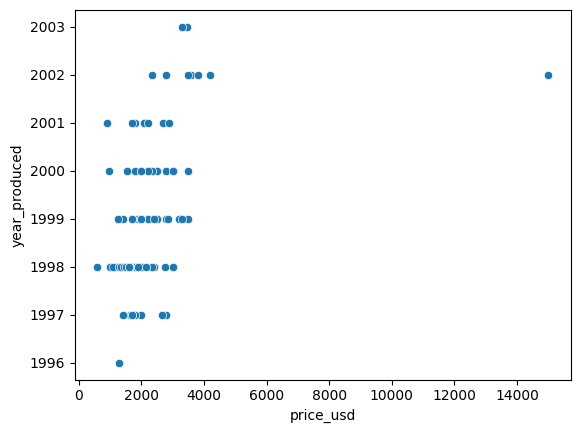

In [ ]:
df2 = df2[(df2['manufacturer_name'] == 'Alfa Romeo') & (df2['model_name'] == '156')] # genero un nuevo df con datos más acotados
sns.scatterplot(y = "year_produced", x = "price_usd", data = df2) 
# veo la relación precio/año de fabricación

<AxesSubplot:xlabel='price_usd', ylabel='year_produced'>

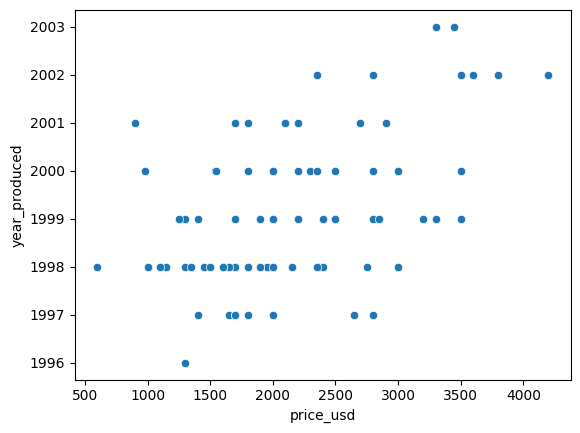

In [ ]:
df2 = df2[ df2.price_usd < 8000 ]
sns.scatterplot(y = "year_produced", x = "price_usd", data = df2)

<h2>Matriz de covarianzas</h2>
<p>La matriz de covarianzas nos permite visualizar la correlación entre más de dos variables, brindándonos a simple vista, cómo se comportan en todas sus posibles combinaciones.</p>
<h3>Visualización</h3>

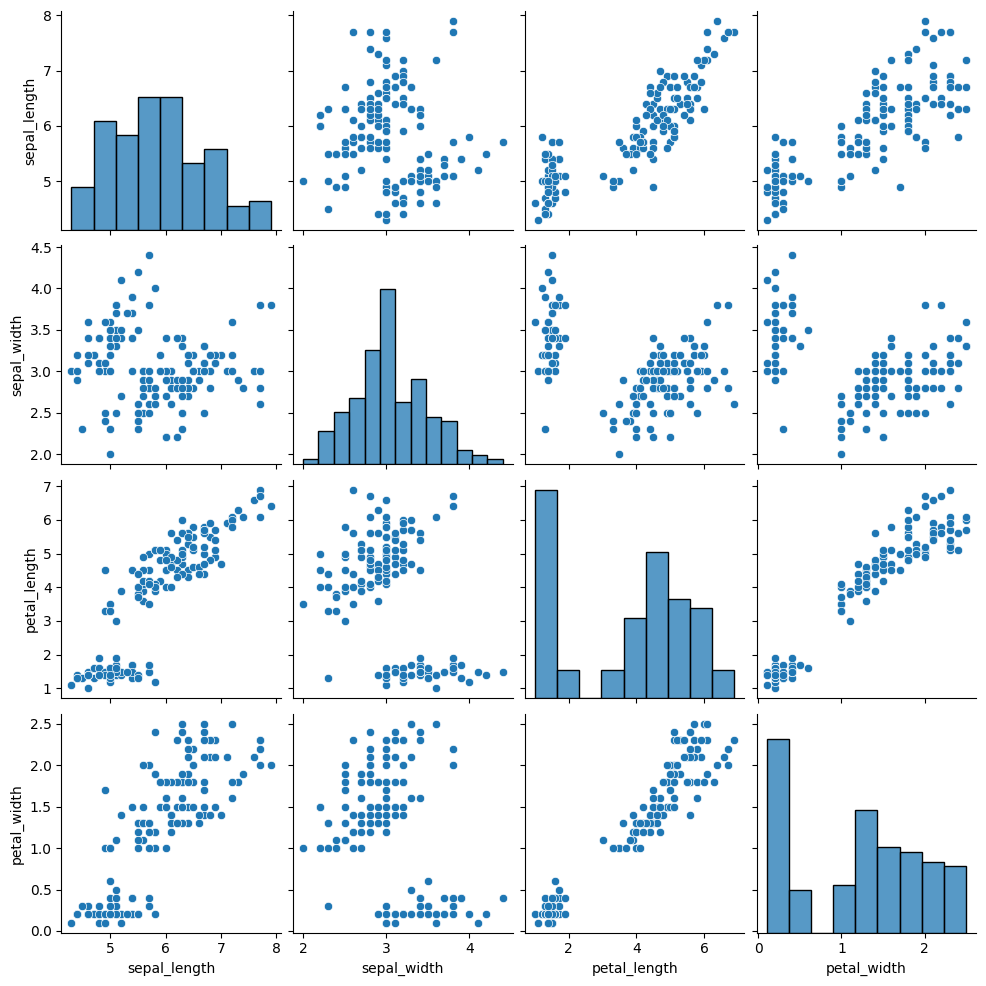

In [ ]:
# MATRIZ DE COVARIANZA
# En las diagonales se muestra la distribución de la variable, y en el resto de los lugares, 
# la covarianza de dos variables
df = sns.load_dataset('iris')
sns.pairplot(df)

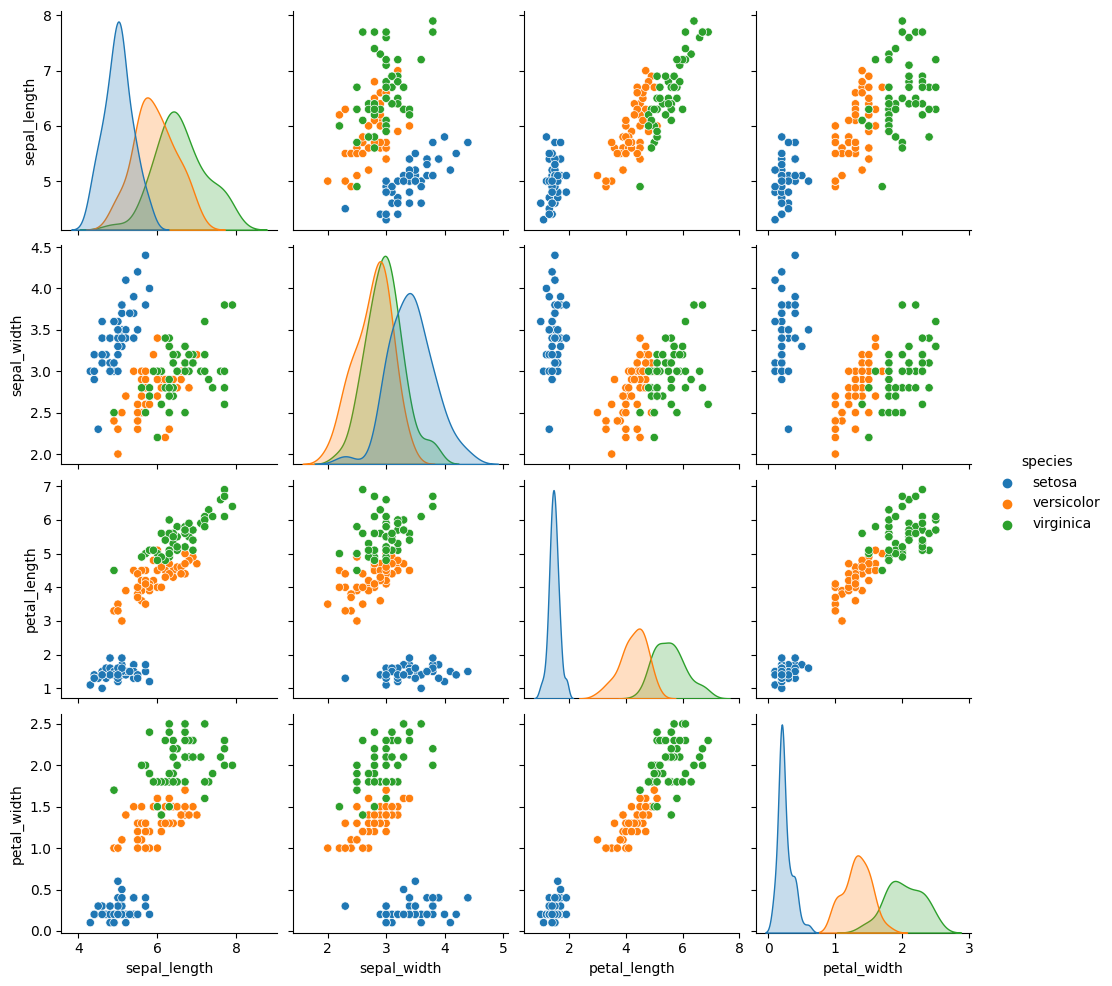

In [ ]:
#discrimina los datos por especie
sns.pairplot(df, hue='species') #discrimina los datos por especie

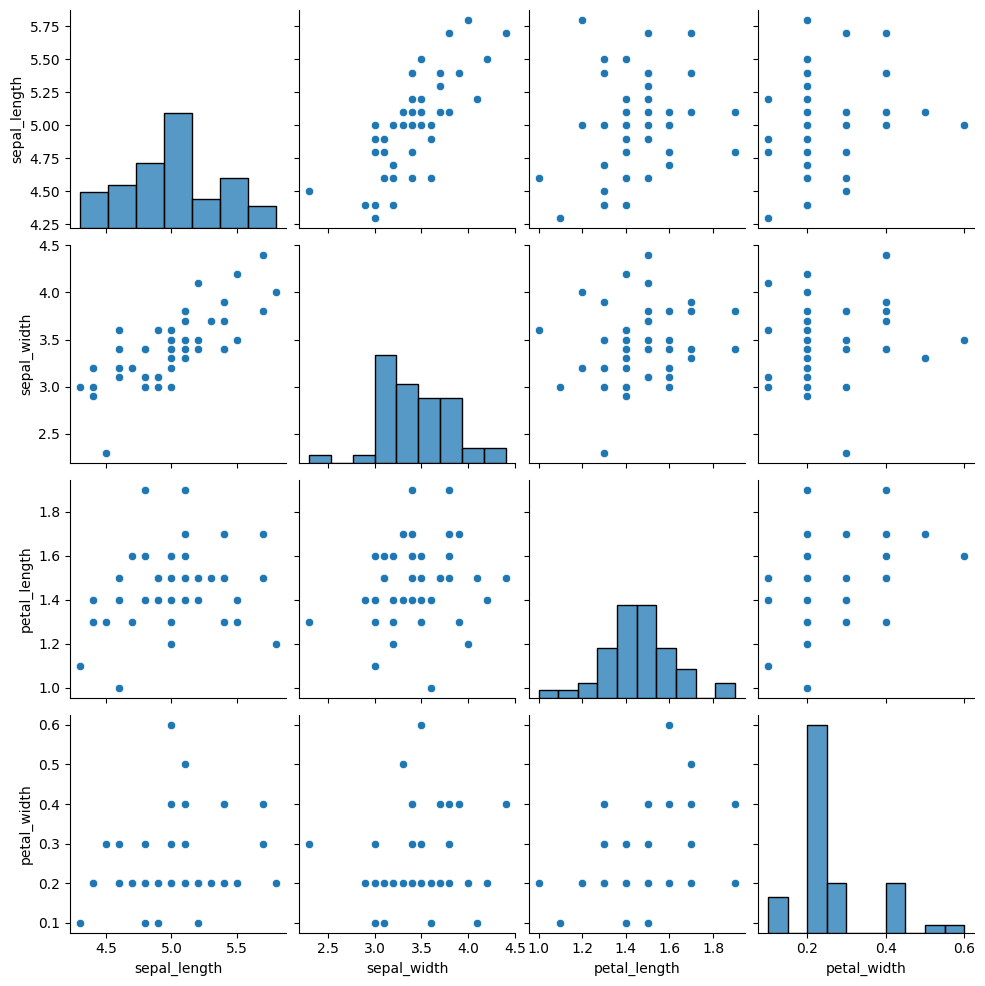

In [ ]:
df_setosa = df [df.species == 'setosa']
sns.pairplot(df_setosa)

<h3>Análisis</h3>
<p>Vamos a obtener una matriz normalizada de acuerdo a la distribución de los datos.  Es la normalización que tiene en cuenta restar por el promedio de variaciones y dividir por la desviación standard de cada variable.</p>
<center><img src ='/work/img/formulacovarianza.png'><img src ='/work/img/rho.png'><center>

In [ ]:
# obtengo las columnas de la matriz  y elijo las que necesito
print(df.columns)
print('Columnas: ',df.columns.size)

print('Filas: ',df.index.size)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Columnas:  5
Filas:  150


In [ ]:
escala = StandardScaler()
escalado = escala.fit_transform(df[ ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] ])
escalado.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

<p>Ahora vamos a obtener la matriz de covarianza.</p>

In [ ]:
matriz_cov = np.cov(escalado.T) # T para transponer
matriz_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

<p>Obtenemos una matriz de 4 filas y 4 columnas.</p>
<p>En su diagonal encontramos la distribución de una variable, y fuera de la diagonal estan las covarianzas de cada par de variables.</p>

In [ ]:
# Para evitar el error de colores por numeros negativos, convertimos a valores sin signo
matriz_cov_abs = abs(matriz_cov)
matriz_cov_abs


array([[1.00671141, 0.11835884, 0.87760447, 0.82343066],
       [0.11835884, 1.00671141, 0.43131554, 0.36858315],
       [0.87760447, 0.43131554, 1.00671141, 0.96932762],
       [0.82343066, 0.36858315, 0.96932762, 1.00671141]])

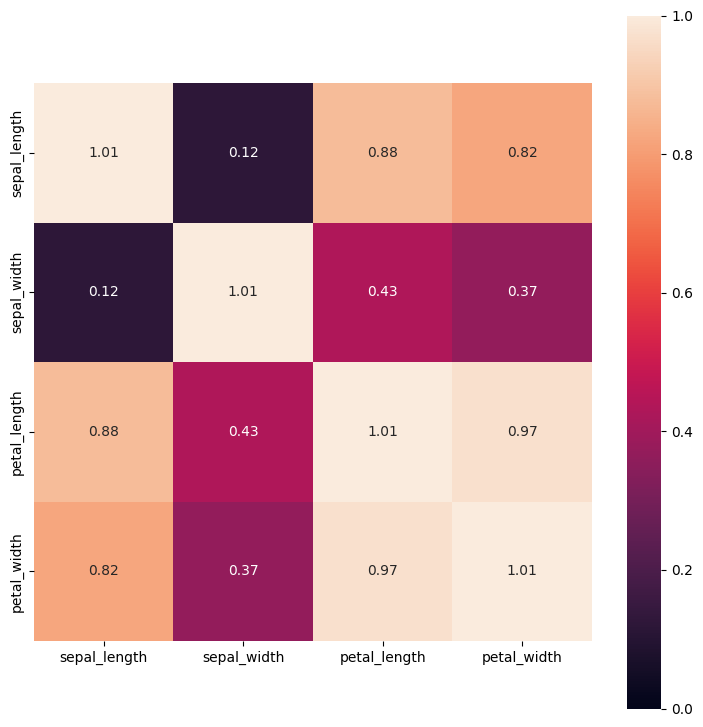

In [ ]:
# Mapa de calor
plt.figure(figsize=(9,9))
mapa_calor = sns.heatmap(matriz_cov_abs, 
                        fmt='.2f',square=True, cbar=True, annot= True, vmin=0, vmax=1,
                        xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Observamos una correcion muy debil (0.12), probablemente provocada por realizar el analisis
# sobre 3 especies de flores diferentes

### Analisis diferenciado por especie

In [ ]:
# Obtenemos dataframes separados
df_setosa = df[ df.species == 'setosa']
df_versicolor = df[ df.species == 'versicolor']
df_virginica = df[ df.species == 'virginica']

# Matrices de escalado
escala = StandardScaler()
escalados_setosa = escala.fit_transform(df_setosa[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
escalados_versicolor = escala.fit_transform(df_versicolor[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
escalados_virginica = escala.fit_transform(df_virginica[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Matrices de covarianzas
matriz_cov_setosa = np.cov(escalados_setosa.T)
matriz_cov_setosa = abs(matriz_cov_setosa)
matriz_cov_versicolor = np.cov(escalados_versicolor.T)
matriz_cov_versicolor = abs(matriz_cov_versicolor)
matriz_cov_virginica = np.cov(escalados_virginica.T)
matriz_cov_virginica = abs(matriz_cov_virginica)


### Flores "setosa"

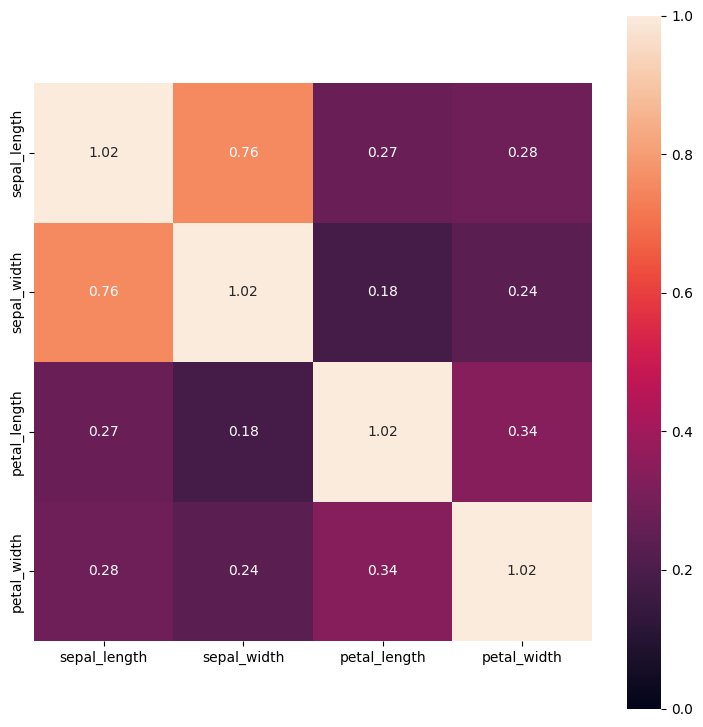

In [ ]:
plt.figure(figsize=(9,9))
mapa_calor = sns.heatmap(matriz_cov_setosa, 
                        fmt='.2f',square=True, cbar=True, annot= True, vmin=0, vmax=1,
                        xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### Flores "versicolor"

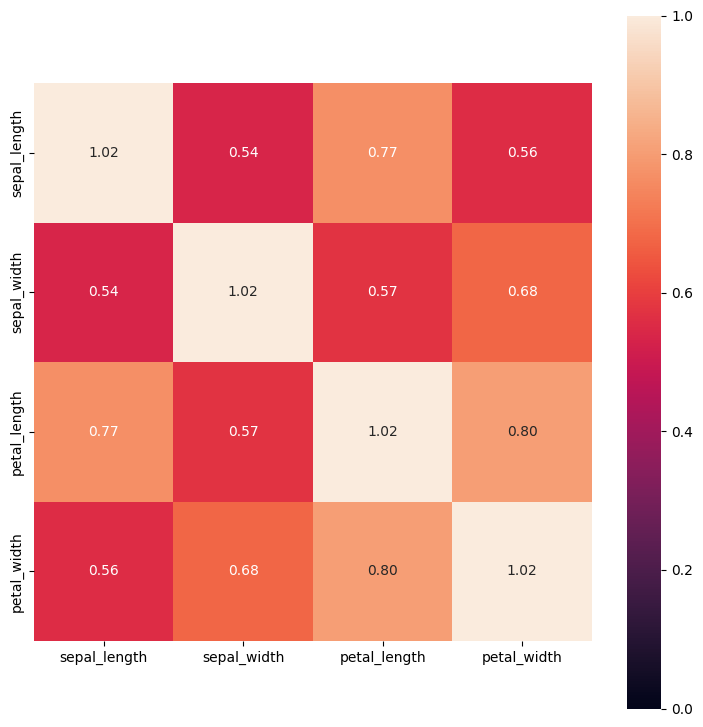

In [ ]:
plt.figure(figsize=(9,9))
mapa_calor = sns.heatmap(matriz_cov_versicolor, 
                        fmt='.2f',square=True, cbar=True, annot= True, vmin=0, vmax=1,
                        xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### Flores "virginica"

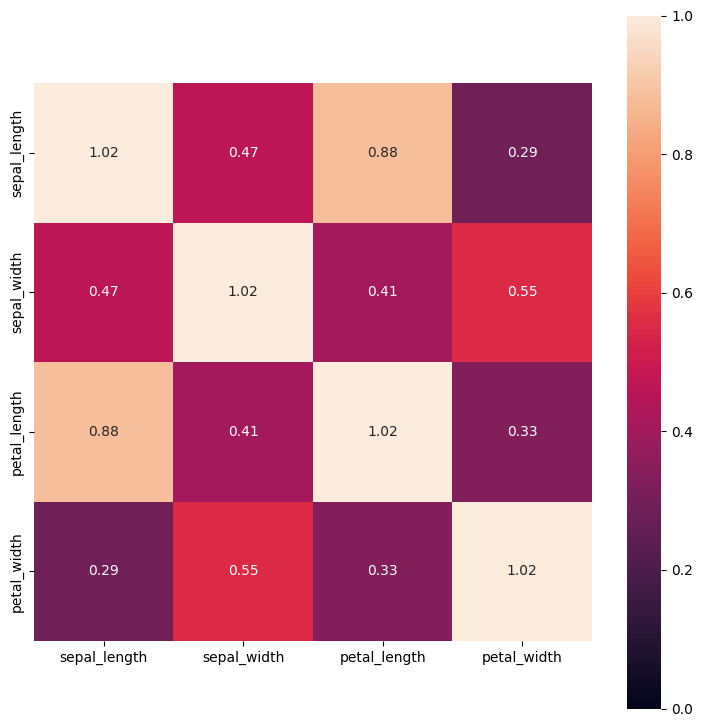

In [ ]:
plt.figure(figsize=(9,9))
mapa_calor = sns.heatmap(matriz_cov_virginica, 
                        fmt='.2f',square=True, cbar=True, annot= True, vmin=0, vmax=1,
                        xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98ba13d5-8296-4b42-9d97-e6e8df3efbf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>